# Playing with Colors!

## Things to try;
1. [refer to cv2 doc](<https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html>)
2. [convert rgb to wavelength](<https://en.wikipedia.org/wiki/YCbCr>)
3. [figure out a formula to get color schmes](<https://www.sessions.edu/color-calculator/>)

## Color Shades

1. Shades of Grey
2. Shades of Red
3. Shades of Green
4. Shades of Blue

In [58]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
import matplotlib.pyplot as plt

# pip install opencv-python

### Shades of Grey

![grey_shades](https://user-images.githubusercontent.com/44990492/59155188-f330ed00-8abe-11e9-913b-8cd50caca655.gif)

In [31]:
width = 400
height = 400
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./grey_shades.avi', fourcc, float(FPS), (width, height))

for shade in range(FPS*seconds):
    color = np.full((width,height,3), round(shade*(255/240)), dtype=np.uint8)
    frame = color
    video.write(frame)

video.release()

### Shades of Red

![red_shades](https://user-images.githubusercontent.com/44990492/59155189-f3c98380-8abe-11e9-99ab-f69054bc865c.gif)

In [43]:
width = 400
height = 400
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./red_shades.avi', fourcc, float(FPS), (width, height))

color = np.full((width,height,3), 0, dtype=np.uint8)

for shade in range(FPS*seconds):
    if round(shade*(255/120)) > 255:
        color[:,:,0] = round(shade*(255/120))
        color[:,:,1] = round(shade*(255/120))
        frame = color
        video.write(frame)
    else:
        color[:,:,2] = round(shade*(255/120))
        frame = color
        video.write(frame)

video.release()

### Shades of Green

![green_shades](https://user-images.githubusercontent.com/44990492/59155191-f3c98380-8abe-11e9-8b35-3dd964a05b79.gif)

In [ ]:
width = 400
height = 400
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./green_shades.avi', fourcc, float(FPS), (width, height))

color = np.full((width,height,3), 0, dtype=np.uint8)

for shade in range(FPS*seconds):
    if round(shade*(255/120)) > 255:
        color[:,:,0] = round(shade*(255/120))
        color[:,:,2] = round(shade*(255/120))
        frame = color
        video.write(frame)
    else:
        color[:,:,1] = round(shade*(255/120))
        frame = color
        video.write(frame)

video.release()

### Shades of Blue

![blue_shades](https://user-images.githubusercontent.com/44990492/59155190-f3c98380-8abe-11e9-9d1c-1b00be0d7c53.gif)

In [44]:
width = 400
height = 400
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./blue_shades.avi', fourcc, float(FPS), (width, height))

color = np.full((width,height,3), 0, dtype=np.uint8)

for shade in range(FPS*seconds):
    if round(shade*(255/120)) > 255:
        color[:,:,1] = round(shade*(255/120))
        color[:,:,2] = round(shade*(255/120))
        frame = color
        video.write(frame)
    else:
        color[:,:,0] = round(shade*(255/120))
        frame = color
        video.write(frame)

video.release()

## Turn video to gif

In [ ]:
import imageio
import os, sys

# pip install imageio-ffmpeg

class TargetFormat(object):
    GIF = ".gif"
    MP4 = ".mp4"
    AVI = ".avi"

def convertFile(inputpath, targetFormat):
    """Reference: http://imageio.readthedocs.io/en/latest/examples.html#convert-a-movie"""
    outputpath = os.path.splitext(inputpath)[0] + targetFormat
    print("converting\r\n\t{0}\r\nto\r\n\t{1}".format(inputpath, outputpath))

    reader = imageio.get_reader(inputpath)
    fps = reader.get_meta_data()['fps']

    writer = imageio.get_writer(outputpath, fps=fps)
    for i,im in enumerate(reader):
        sys.stdout.write("\rframe {0}".format(i))
        sys.stdout.flush()
        writer.append_data(im)
    print("\r\nFinalizing...")
    writer.close()
    print("Done.")

convertFile(r"C:\python_ML\blue_shades.avi", TargetFormat.GIF)

## Play with image!

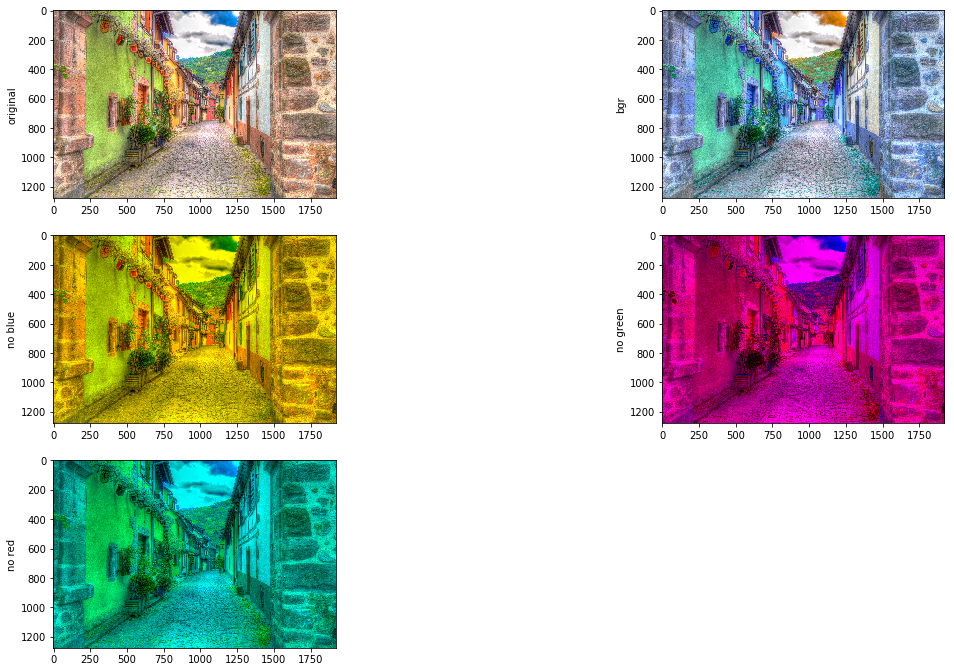

In [85]:
image_bgr = cv2.imread(r'rando_street.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2BGR)

image_no_blue = image_bgr.copy()
image_no_blue[:,:,0] = 0
image_no_blue = cv2.cvtColor(image_no_blue, cv2.COLOR_RGB2BGR)

image_no_green = image_bgr.copy()
image_no_green[:,:,1] = 0
image_no_green = cv2.cvtColor(image_no_green, cv2.COLOR_RGB2BGR)

image_no_red = image_bgr.copy()
image_no_red[:,:,2] = 0
image_no_red = cv2.cvtColor(image_no_red, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(20, 20))
plt.subplot(521)
plt.ylabel('original')
plt.imshow(image_rgb)

plt.subplot(522)
plt.ylabel('bgr')
plt.imshow(image_bgr)

plt.subplot(523)
plt.ylabel('no blue')
plt.imshow(image_no_blue)

plt.subplot(524)
plt.ylabel('no green')
plt.imshow(image_no_green)

plt.subplot(525)
plt.ylabel('no red')
plt.imshow(image_no_red)

plt.show()